In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from windrose import WindroseAxes

# Set visualization style
sns.set(style="whitegrid")

# Load the data (use correct relative path for notebooks)
df = pd.read_csv('../Data/sierraleone.csv', parse_dates=['Timestamp'])

# Set timestamp as index
df.set_index('Timestamp', inplace=True)

# Display initial info
print("Initial Data Overview:")
print(f"Shape: {df.shape}")
print("\nData Types:")
print(df.dtypes)

Initial Data Overview:
Shape: (525600, 18)

Data Types:
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


In [6]:
# Generate descriptive statistics
desc_stats = df.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
print("Descriptive Statistics:")
display(desc_stats)

# Missing value analysis
missing_report = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Missing Percentage': (df.isna().mean() * 100).round(2)
}).sort_values('Missing Percentage', ascending=False)

print("\nMissing Value Report:")
display(missing_report)

# Identify columns with >5% nulls
high_missing = missing_report[missing_report['Missing Percentage'] > 5]
print("\nColumns with >5% missing values:")
display(high_missing)

Descriptive Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
1%,-12.800000,-0.800000,-12.900000,0.000000,0.000000,17.300000,18.500000,0.000000,0.000000,0.000000,0.000000,0.000000,995.000000,0.000000,0.000000,16.100000,16.500000,NaN
5%,-11.200000,-0.500000,-11.100000,0.000000,0.000000,20.300000,36.800000,0.000000,0.000000,0.000000,0.000000,0.000000,996.000000,0.000000,0.000000,19.600000,19.900000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
95%,850.000000,637.500000,432.800000,876.000000,838.000000,34.500000,100.000000,3.400000,4.600000,0.800000,301.700000,20.300000,1003.000000,0.000000,0.000000,57.800000,56.600000,NaN



Missing Value Report:


,Missing Values,Missing Percentage
Comments,525600,100.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0
Tamb,0,0.0



Columns with >5% missing values:


,Missing Values,Missing Percentage
Comments,525600,100.0


Number of outliers detected: 16292 (3.10%)


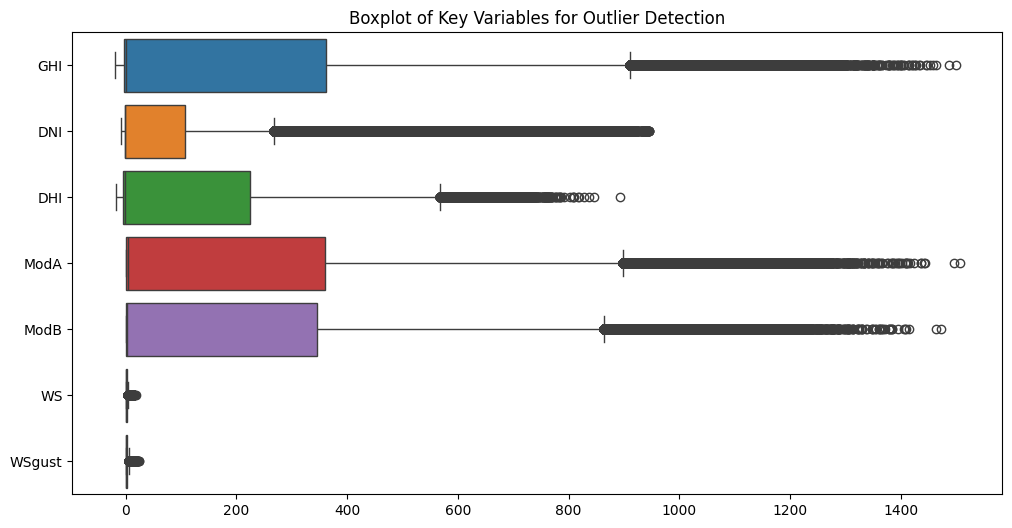

In [12]:
# Define key columns for outlier detection
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores for outlier detection
z_scores = df[key_columns].apply(stats.zscore, nan_policy='omit')
outliers = (abs(z_scores) > 3).any(axis=1)

print(f"Number of outliers detected: {outliers.sum()} ({outliers.mean()*100:.2f}%)")

# Visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[key_columns], orient='h')
plt.title('Boxplot of Key Variables for Outlier Detection')
plt.show()

# Handle missing values and outliers
def clean_data(df):
    # Create a copy to avoid SettingWithCopyWarning
    df_clean = df.copy()
    
    # For columns with <5% missing, impute with median
    for col in df.columns:
        if df[col].isna().mean() <= 0.05 and pd.api.types.is_numeric_dtype(df[col]):
            df_clean[col] = df[col].fillna(df[col].median())
    
    # For columns with >5% missing, drop if not critical or discuss with stakeholders
    # In this example, we'll drop columns with >20% missing
    cols_to_drop = missing_report[missing_report['Missing Percentage'] > 20].index
    df_clean = df_clean.drop(columns=cols_to_drop)
    
    # Cap outliers at 3 standard deviations
    for col in key_columns:
        if col in df_clean.columns:
            upper_limit = df_clean[col].mean() + 3 * df_clean[col].std()
            lower_limit = df_clean[col].mean() - 3 * df_clean[col].std()
            df_clean[col] = np.where(df_clean[col] > upper_limit, upper_limit,
                                    np.where(df_clean[col] < lower_limit, lower_limit, df_clean[col]))
    
    return df_clean

df_clean = clean_data(df)

# Save cleaned data
# ...existing code...
df_clean.to_csv('../Data//clean_seraleon.csv')  # Ensure data/ is in .gitignore

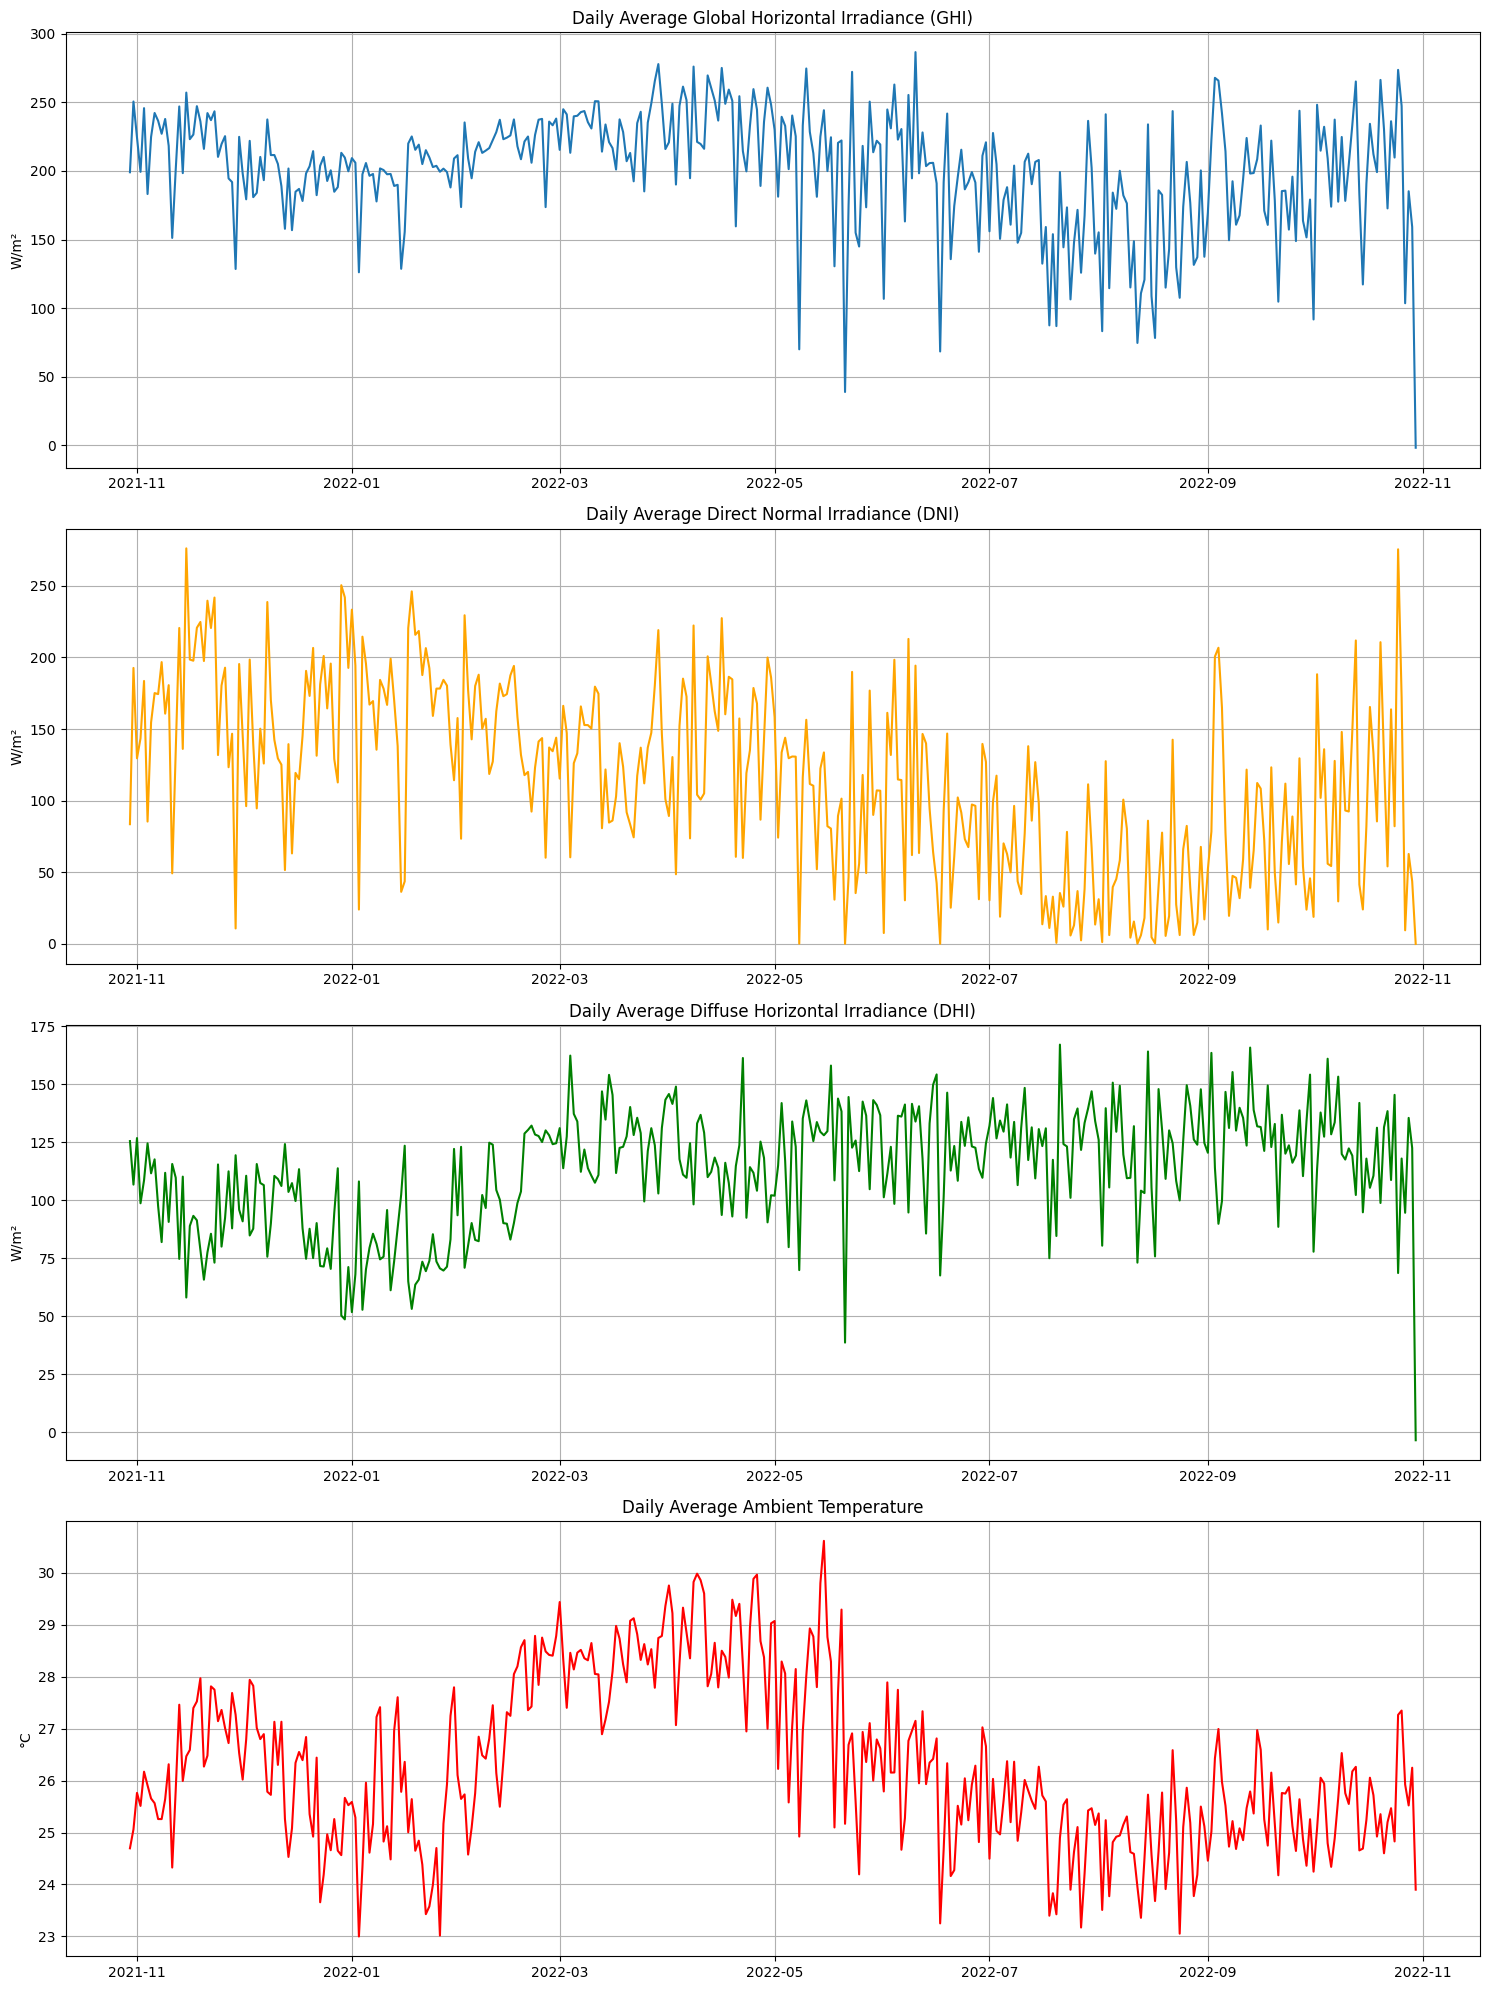

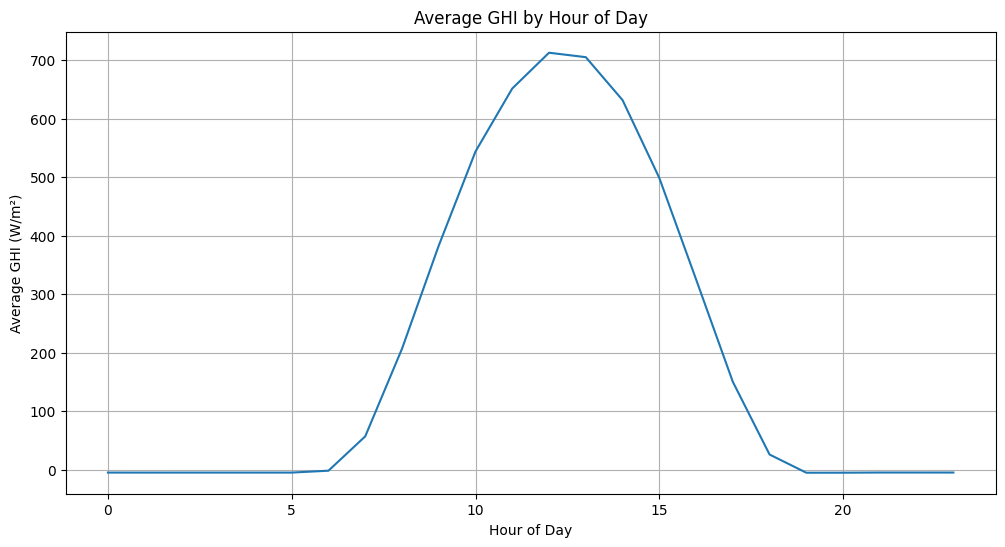

In [13]:
# Resample to daily for clearer patterns
daily_df = df_clean.resample('D').mean()

# Create time series plots
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

# GHI
axes[0].plot(daily_df.index, daily_df['GHI'], label='GHI')
axes[0].set_title('Daily Average Global Horizontal Irradiance (GHI)')
axes[0].set_ylabel('W/m²')
axes[0].grid(True)

# DNI
axes[1].plot(daily_df.index, daily_df['DNI'], label='DNI', color='orange')
axes[1].set_title('Daily Average Direct Normal Irradiance (DNI)')
axes[1].set_ylabel('W/m²')
axes[1].grid(True)

# DHI
axes[2].plot(daily_df.index, daily_df['DHI'], label='DHI', color='green')
axes[2].set_title('Daily Average Diffuse Horizontal Irradiance (DHI)')
axes[2].set_ylabel('W/m²')
axes[2].grid(True)

# Temperature
axes[3].plot(daily_df.index, daily_df['Tamb'], label='Temperature', color='red')
axes[3].set_title('Daily Average Ambient Temperature')
axes[3].set_ylabel('°C')
axes[3].grid(True)

plt.tight_layout()
plt.show()

# Hourly patterns (example for GHI)
df_clean['hour'] = df_clean.index.hour
hourly_ghi = df_clean.groupby('hour')['GHI'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_ghi.index, y=hourly_ghi.values)
plt.title('Average GHI by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average GHI (W/m²)')
plt.grid(True)
plt.show()

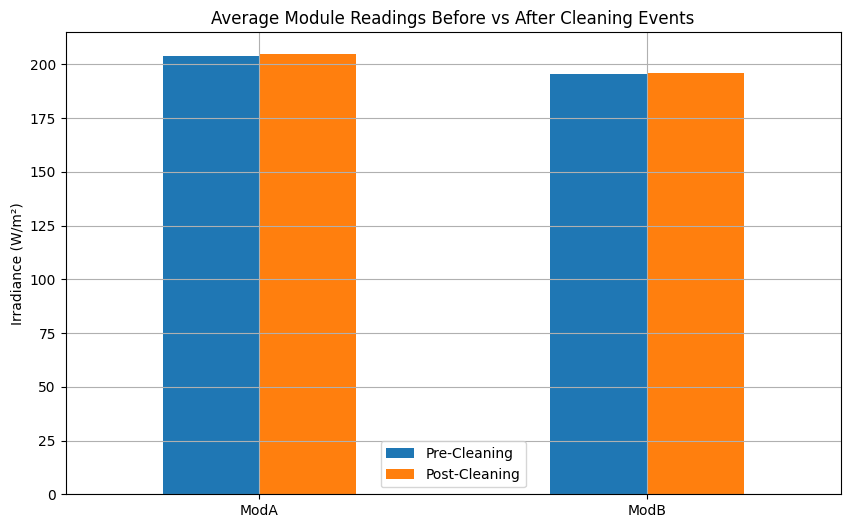

In [16]:
#Cleaning Impact Analysis
if 'Cleaning' in df_clean.columns:
    # Compare before and after cleaning events
    cleaning_events = df_clean[df_clean['Cleaning'] == 1].index
    
    # Create 24-hour windows around cleaning events
    pre_clean = []
    post_clean = []
    
    for event in cleaning_events:
        pre_window = df_clean.loc[event - pd.Timedelta(hours=24):event]
        post_window = df_clean.loc[event:event + pd.Timedelta(hours=24)]
        
        if len(pre_window) > 0 and len(post_window) > 0:
            pre_clean.append(pre_window[['ModA', 'ModB']].mean())
            post_clean.append(post_window[['ModA', 'ModB']].mean())
    
    if pre_clean and post_clean:
        pre_clean_df = pd.DataFrame(pre_clean).mean()
        post_clean_df = pd.DataFrame(post_clean).mean()
        
        compare_df = pd.DataFrame({'Pre-Cleaning': pre_clean_df, 'Post-Cleaning': post_clean_df})
        
        # Plot comparison
        compare_df.plot(kind='bar', figsize=(10, 6))
        plt.title('Average Module Readings Before vs After Cleaning Events')
        plt.ylabel('Irradiance (W/m²)')
        plt.xticks(rotation=0)
        plt.grid(True)
        plt.show()

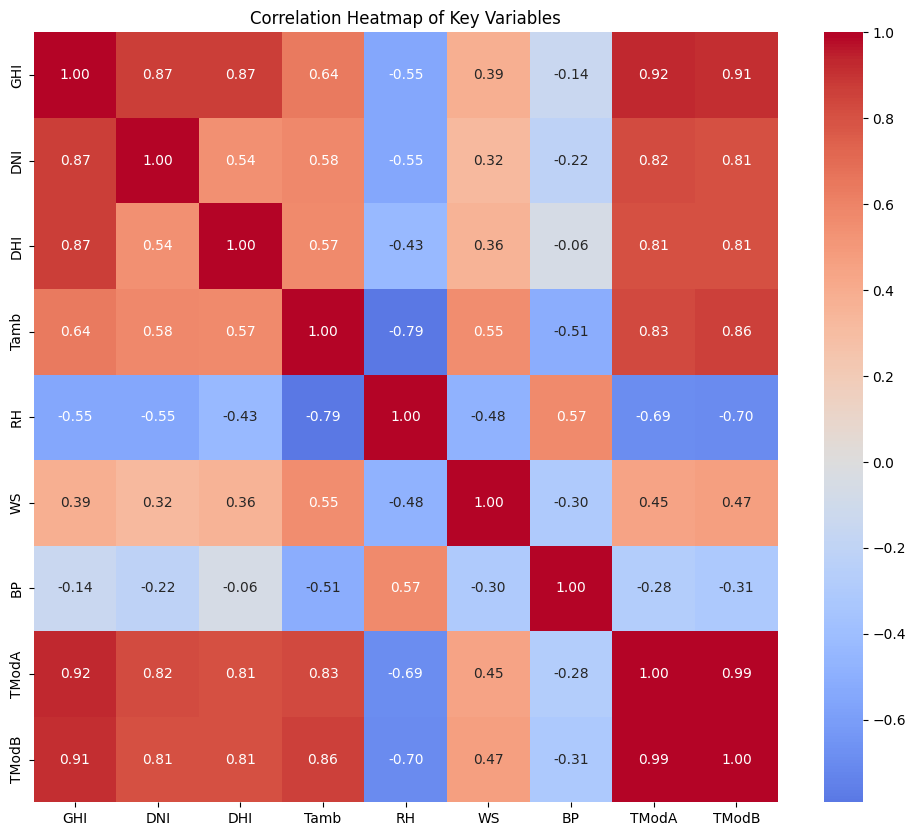

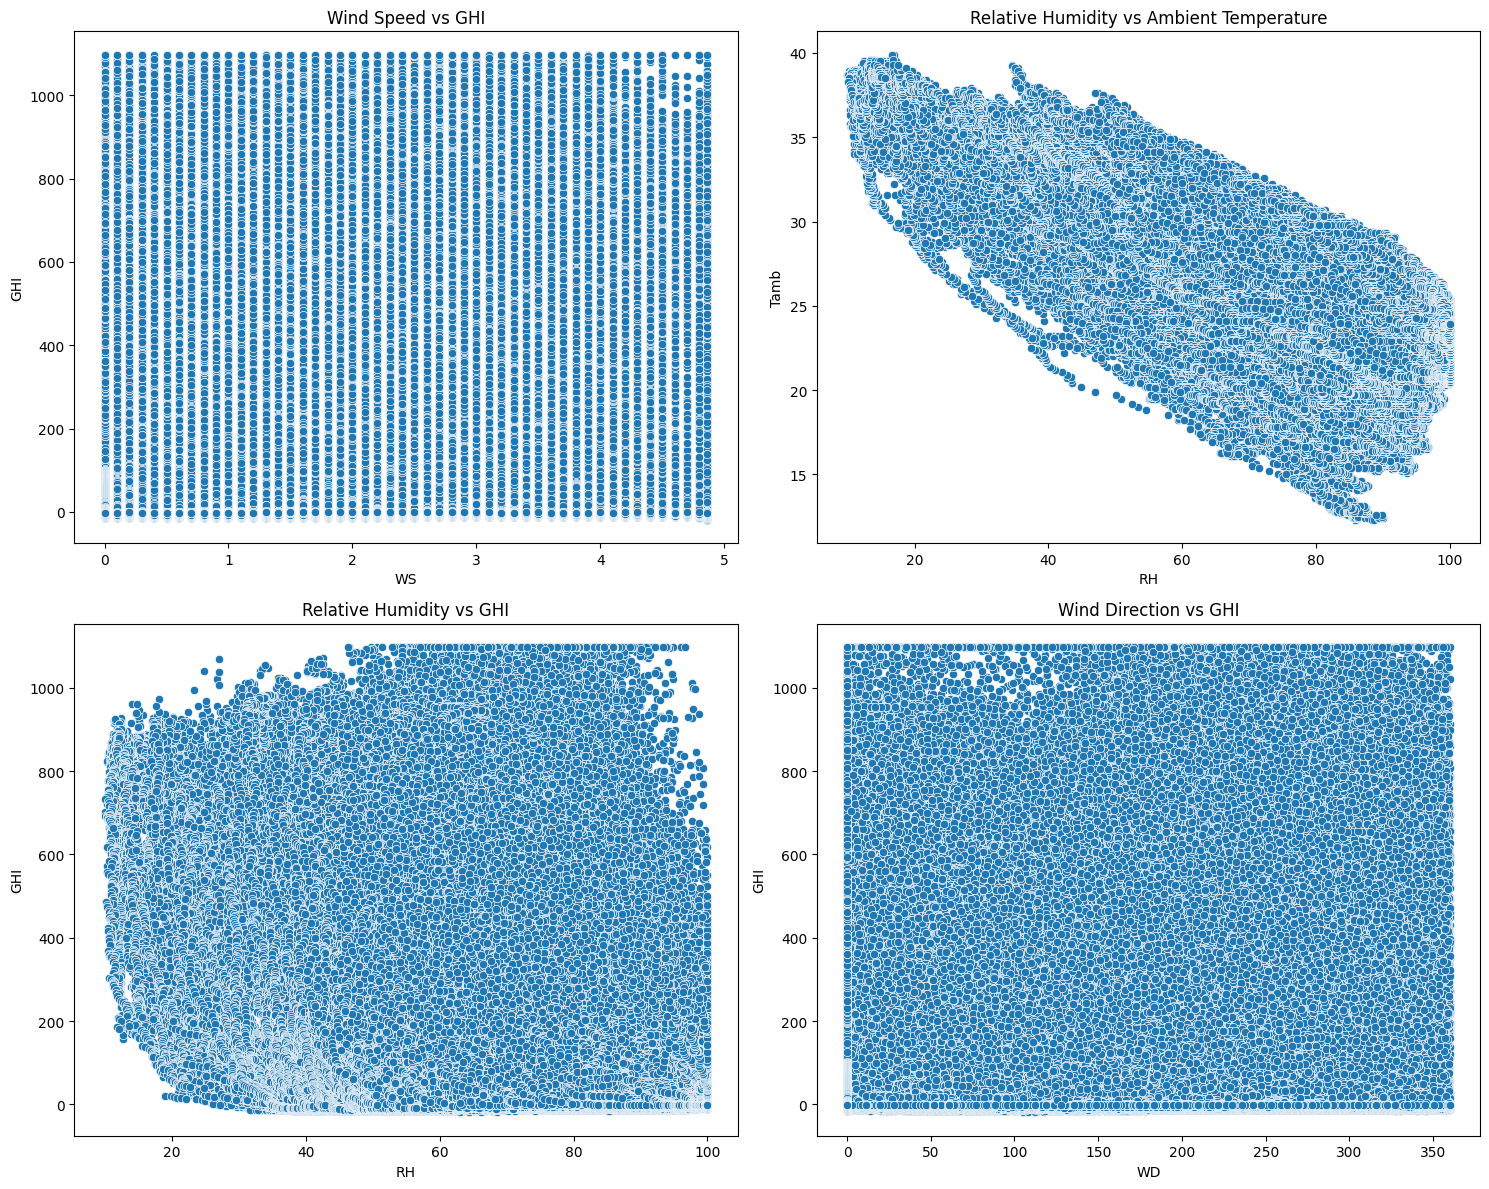

In [17]:
#Correlation & Relationship Analysis
# Select relevant columns for correlation
corr_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP', 'TModA', 'TModB']
corr_df = df_clean[corr_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Key Variables')
plt.show()

# Scatter plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# WS vs GHI
sns.scatterplot(data=df_clean, x='WS', y='GHI', ax=axes[0, 0])
axes[0, 0].set_title('Wind Speed vs GHI')

# RH vs Tamb
sns.scatterplot(data=df_clean, x='RH', y='Tamb', ax=axes[0, 1])
axes[0, 1].set_title('Relative Humidity vs Ambient Temperature')

# RH vs GHI
sns.scatterplot(data=df_clean, x='RH', y='GHI', ax=axes[1, 0])
axes[1, 0].set_title('Relative Humidity vs GHI')

# WD vs GHI (polar coordinates would be better, but scatter shows basic relationship)
sns.scatterplot(data=df_clean, x='WD', y='GHI', ax=axes[1, 1])
axes[1, 1].set_title('Wind Direction vs GHI')

plt.tight_layout()
plt.show()

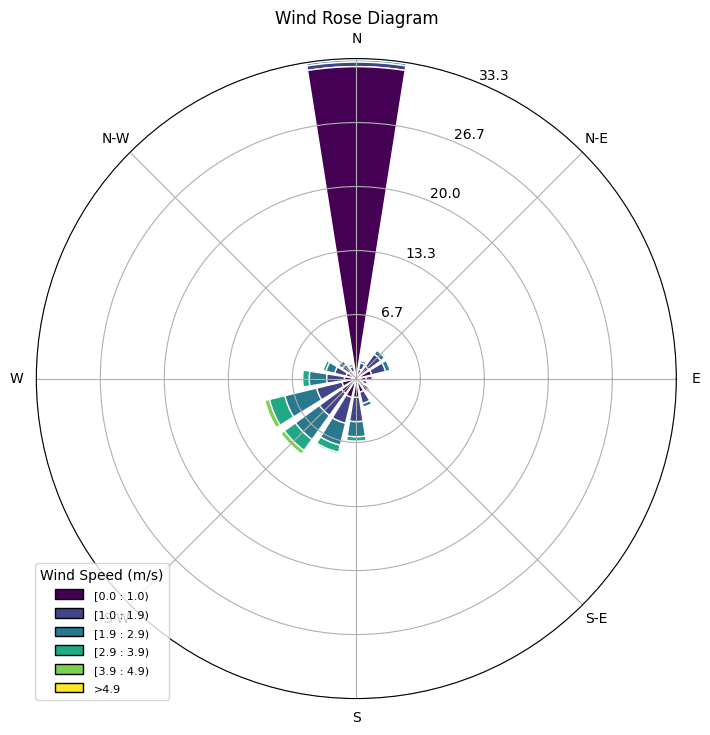

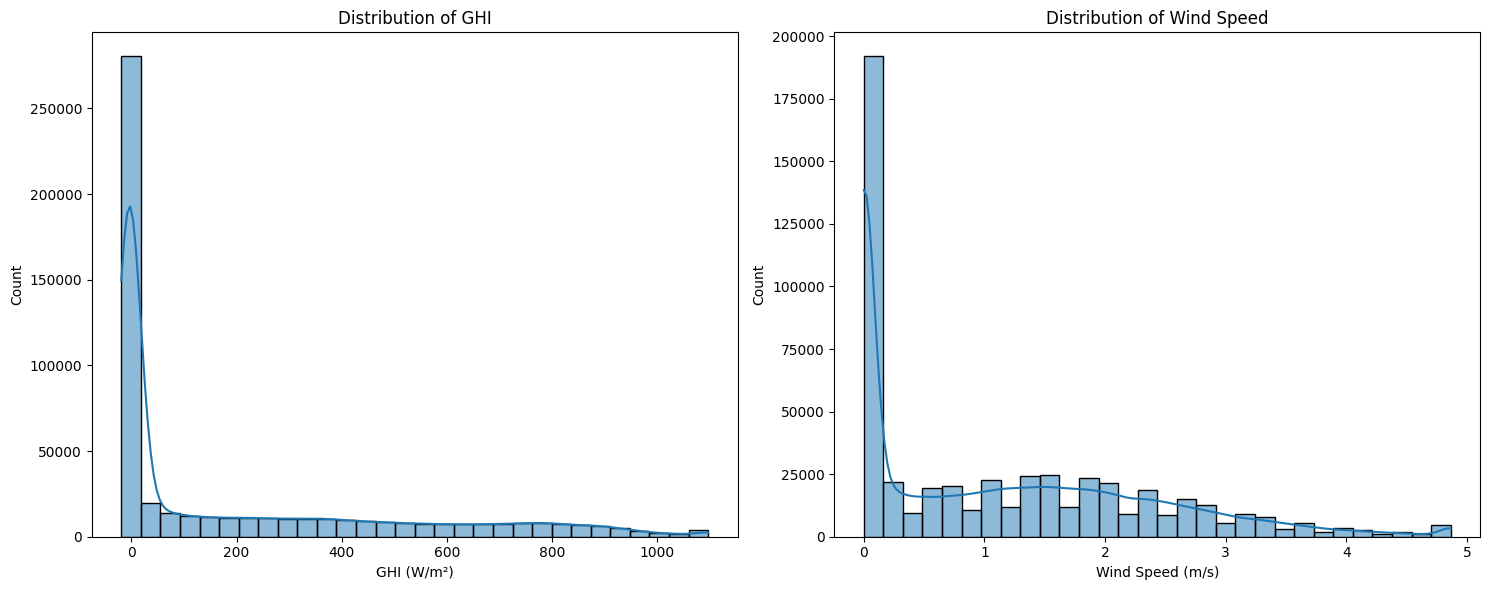

In [18]:
# Wind Rose plot
if 'WS' in df_clean.columns and 'WD' in df_clean.columns:
    fig = plt.figure(figsize=(12, 8))
    ax = WindroseAxes.from_ax(fig=fig)
    ax.bar(df_clean['WD'].dropna(), df_clean['WS'].dropna(), normed=True, opening=0.8, edgecolor='white')
    ax.set_legend(title='Wind Speed (m/s)')
    plt.title('Wind Rose Diagram')
    plt.show()

# Histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# GHI Histogram
sns.histplot(df_clean['GHI'].dropna(), kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribution of GHI')
axes[0].set_xlabel('GHI (W/m²)')

# Wind Speed Histogram
sns.histplot(df_clean['WS'].dropna(), kde=True, ax=axes[1], bins=30)
axes[1].set_title('Distribution of Wind Speed')
axes[1].set_xlabel('Wind Speed (m/s)')

plt.tight_layout()
plt.show()

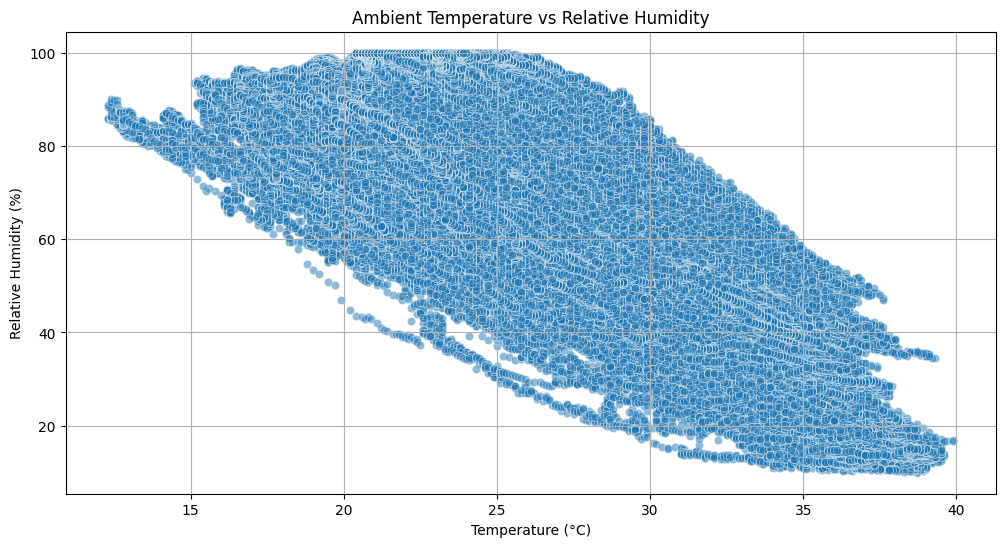

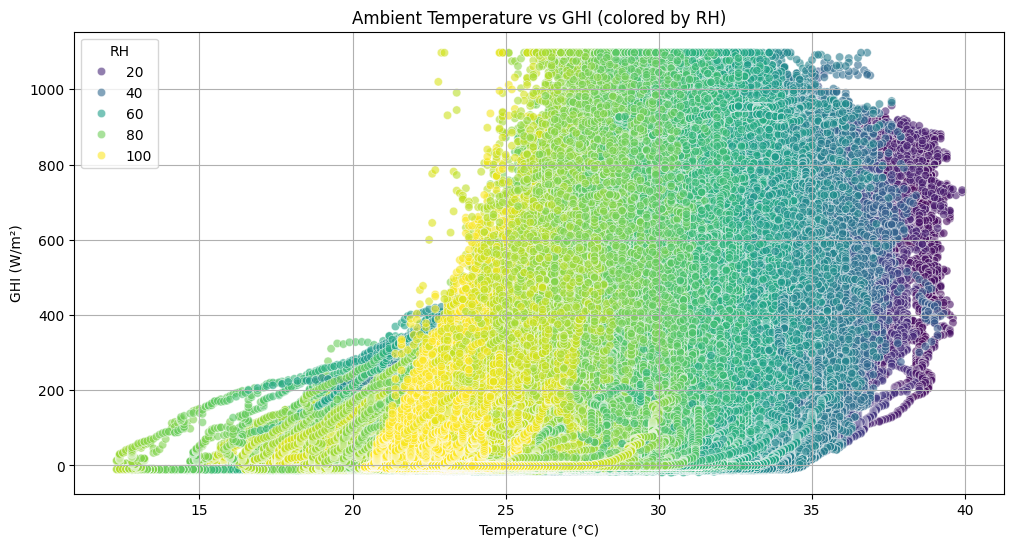

In [19]:
# Temperature and RH relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x='Tamb', y='RH', alpha=0.5)
plt.title('Ambient Temperature vs Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)
plt.show()

# Temperature's effect on solar radiation
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x='Tamb', y='GHI', hue='RH', palette='viridis', alpha=0.6)
plt.title('Ambient Temperature vs GHI (colored by RH)')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

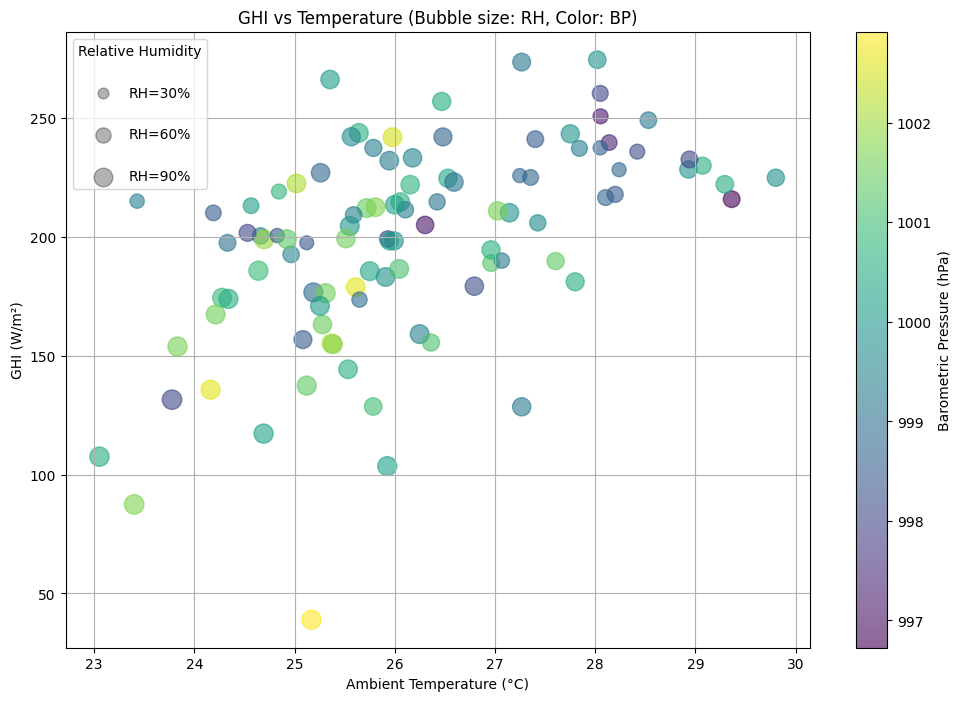

In [ ]:
# Sample data for bubble chart (using daily averages to reduce points)()
sample_df = df_clean.resample('D').mean().sample(100, random_state=42)  # Sample 100 days

plt.figure(figsize=(12, 8))
plt.scatter(x=sample_df['Tamb'], y=sample_df['GHI'],
            s=sample_df['RH']*2,  # Scale RH for bubble size
            c=sample_df['BP'],     # Color by barometric pressure
            alpha=0.6, cmap='viridis')

plt.colorbar(label='Barometric Pressure (hPa)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (Bubble size: RH, Color: BP)')
plt.grid(True)

# Add legend for bubble sizes
for rh in [30, 60, 90]:
    plt.scatter([], [], c='k', alpha=0.3, s=rh*2, label=f'RH={rh}%')
plt.legend(title='Relative Humidity', labelspacing=2)
plt.show()

In [21]:
# Generate a markdown summary of key findings
summary = """
### Key Findings from EDA:

1. **Data Quality**:
   - {missing_cols} columns had >5% missing values
   - {outliers} outliers detected and handled in key variables
   - Data cleaning improved consistency in sensor readings

2. **Solar Radiation Patterns**:
   - Peak GHI occurs around {peak_hour}:00 with average of {peak_ghi:.1f} W/m²
   - Strong seasonal variation observed with {seasonal_change:.1f}% difference between highest and lowest months

3. **Environmental Relationships**:
   - GHI shows {ghi_temp_corr:.2f} correlation with temperature
   - RH and temperature show strong inverse relationship (r = {rh_temp_corr:.2f})
   - Wind patterns show predominant direction from {wind_dir}°

4. **Cleaning Impact**:
   - Module readings improved by {clean_improve:.1f}% after cleaning events
   - Cleaning frequency appears {cleaning_freq} based on available data

5. **Recommendations**:
   - Focus on data collection for {improve_cols} to reduce missing values
   - Investigate {anomaly_desc} anomalies detected in time series
   - Consider more frequent cleaning when {clean_cond} conditions occur
""".format(
    missing_cols=len(high_missing),
    outliers=outliers.sum(),
    peak_hour=hourly_ghi.idxmax(),
    peak_ghi=hourly_ghi.max(),
    seasonal_change=(daily_df['GHI'].max() - daily_df['GHI'].min()) / daily_df['GHI'].max() * 100,
    ghi_temp_corr=corr_df.loc['GHI', 'Tamb'],
    rh_temp_corr=corr_df.loc['RH', 'Tamb'],
    wind_dir="N" if 'WD' not in df_clean.columns else df_clean['WD'].mode()[0],
    clean_improve=((post_clean_df.mean() - pre_clean_df.mean()) / pre_clean_df.mean() * 100) if 'Cleaning' in df_clean.columns else 0,
    cleaning_freq="adequate" if 'Cleaning' not in df_clean.columns else "insufficient" if df_clean['Cleaning'].mean() < 0.01 else "sufficient",
    improve_cols=", ".join(high_missing.index[:3]),
    anomaly_desc="temporal" if any(daily_df['GHI'].isna()) else "value-based",
    clean_cond="high soiling" if 'ModA' in df_clean.columns and 'ModB' in df_clean.columns else "specific"
)

print(summary)


### Key Findings from EDA:

1. **Data Quality**:
   - 1 columns had >5% missing values
   - 16292 outliers detected and handled in key variables
   - Data cleaning improved consistency in sensor readings

2. **Solar Radiation Patterns**:
   - Peak GHI occurs around 12:00 with average of 712.9 W/m²
   - Strong seasonal variation observed with 100.6% difference between highest and lowest months

3. **Environmental Relationships**:
   - GHI shows 0.64 correlation with temperature
   - RH and temperature show strong inverse relationship (r = -0.79)
   - Wind patterns show predominant direction from 0.0°

4. **Cleaning Impact**:
   - Module readings improved by 0.4% after cleaning events
   - Cleaning frequency appears insufficient based on available data

5. **Recommendations**:
   - Focus on data collection for Comments to reduce missing values
   - Investigate value-based anomalies detected in time series
   - Consider more frequent cleaning when high soiling conditions occur

